Linear Regression model to predict the chance a student have in other to be admitted after written a GRE or TOEFL  

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

reading the dataset into the notebook using pandas library

In [81]:
Admission_Predict = pd.read_csv("/content/Admission_Predict.csv")
Admission_Predict.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


**Checking for missing data**

In [82]:
Admission_Predict.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

**Data types**

In [83]:
Admission_Predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


**Dropping features that are not necessary for performing regression**

In [84]:
Admission_Predict_1 = Admission_Predict.drop(columns=['Serial No.'], axis=1)
Admission_Predict_1

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


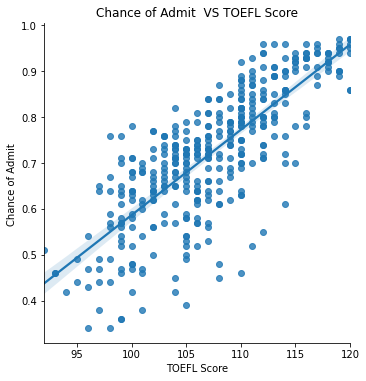

In [85]:
fig=sns.lmplot(x='TOEFL Score',y='Chance of Admit ',data=Admission_Predict_1)
plt.title("Chance of Admit  VS TOEFL Score")
plt.show()

The graph above shows that people that score high in TOEFL exams tends to stand better chance of getting admitted into the university of high rating compare to others

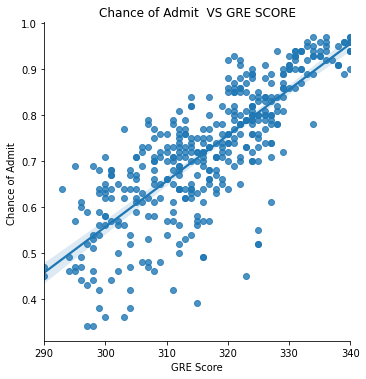

In [86]:
fig=sns.lmplot(x='GRE Score',y='Chance of Admit ',data=Admission_Predict_1)
plt.title("Chance of Admit  VS GRE SCORE")
plt.show()

The graph above shows that people that score high in GRE exams tends to stand better chance of getting admitted into the university of high rating compare to others

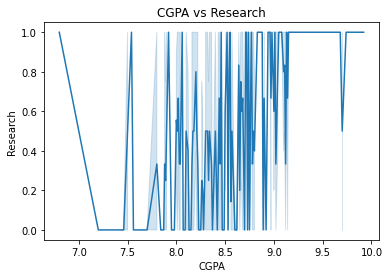

In [87]:
fig=sns.lineplot(x='CGPA',y='Research',data=Admission_Predict_1)
plt.title("CGPA vs Research")
plt.show()

The graph above shows that people with high CGPA tends to carryout more resarch compare to their conterpart

**Checking for the correlation between variables**

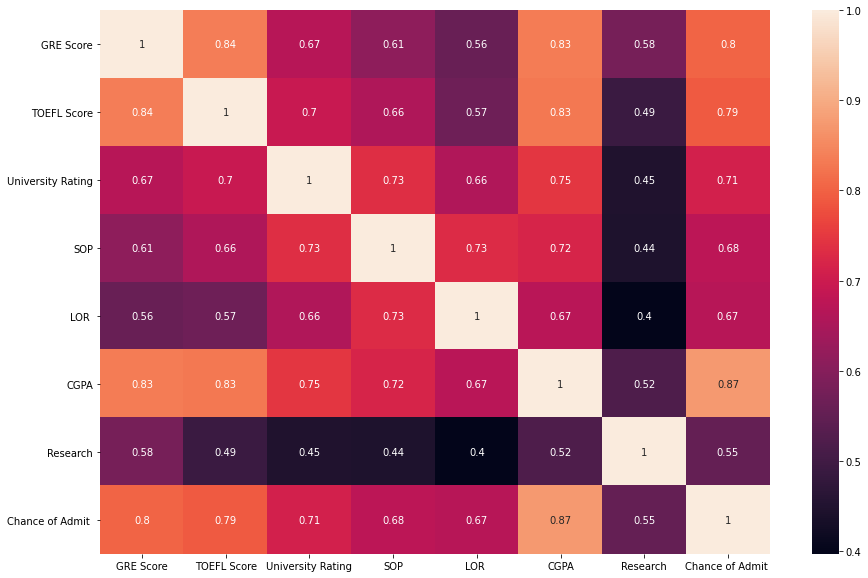

In [88]:
plt.figure(figsize=(15,10))
sns.heatmap(Admission_Predict_1.corr(), annot=True)

From the heatmap we can tell that the relationship between chances of admitted into university depending on either your TOEFL score or your GRE score the higher the score the better the chance of you getting admission

In [89]:
Admission_Predict_1.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


The describe show that there are no outliers between the scores in the exam

Splitting dataset into x and y variables where the x=independent and y=dependent variable

In [90]:
y = Admission_Predict_1['Chance of Admit ']
x = Admission_Predict_1.drop(columns=['Chance of Admit '], axis=1)

**converting the dependent variable from series to a numpy array and reshaping it from 1D array to a 2D array**

In [91]:
y_1 = y.to_numpy().reshape((-1, 1))

**splitting dataset into train and test**

In [92]:
X_train, X_test, y_train, y_test = train_test_split(x, y_1, test_size=.20, random_state=45 )

**fitting the models**

In [93]:
model = LinearRegression()
admin_chance = model.fit(X_train, y_train)

**Getting my r_square(Coefficient of determination)**

In [94]:
coef_deter = admin_chance.score(X_train, y_train)
coef_deter

0.8025359599838279

**Adjusted r_square**

From the prediction score it shows that our coefficient of determination is 80% it goes to say the model has 80% of predicting the chance of getting admission into the university

In [ ]:
1 - (1-model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

This shows that even with addition of more variable to the model, the model will have 79.8% ~ 80% of predicting the variables

In [95]:
intercept = model.coef_
intercept

array([[ 0.00215273,  0.00217638,  0.00522328, -0.00127586,  0.01996118,
         0.12148871,  0.02298341]])

The Coefficient above shows that there is a positive relationship between the independent variables and the dependent variable apart from SOP which has a negative relationship with the dependent variable. 

In [100]:
y_predict = admin_chance.predict(X_test)

In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE : ",mean_absolute_error(y_test, y_predict))
print("MSE : ",mean_squared_error(y_test, y_predict))
print("R2 score : ",r2_score(y_test, y_predict))

MAE :  0.044405536774571985
MSE :  0.003321683663424673
R2 score :  0.8049825387312869
